# Week 8 Study Notebook

# UC San Diego OMDS DSC 207

## Imports

In [30]:
#LOAD LIBRARIES
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import os

# Part 1: Clustering

#### 1.1 For our KMeans clustering task, read only the following columns into a dataframe `X` using the following link: https://gist.githubusercontent.com/netj/8836201/raw/.

1. "sepal.length"
2. "sepal.width"
3. "petal.length"
4. "petal.width"

Print the head() of `X`. [1 pt]

In [31]:
# set the working directory
os.chdir('/home/scotty/dsc_207_week8')

# create pandas dataframe df from week8.csv 
df = pd.read_csv('week8.csv')

# define X by drop variety column 
X = df.drop(columns=['variety'])
# print head of X
print(X.head())

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### 1.2 Defining the model

Import and define a model using <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html'>sklearn.cluster.kmeans</a> [0.5 pt].<br>
**Pick any value for the number of clusters for now.**<br>


In [ ]:
# define number of clusters based on unique members in categorical data(X['variety'])
clusters = df.variety.nunique()

# define kmeans model from sklearn
kmeans = sklearn.cluster.KMeans(n_clusters=clusters, random_state=42)

#### 1.3 [Fit and predict](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict) the kmeans model on `X`. Print the predicted values. [0.5 pt]

In [33]:
# fit X using sklearn KMeans model
kmeans.fit(X)

# predict kmeans model on X.. predict cluster for each point in dataframe X
y_kmeans = kmeans.predict(X)

# print predictied values from the kmeans model(y_kmeans)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 0 3 3 2 3 3 3 0
 0 3 0 0 0 0 3 3 0 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 3 0 0 3 3 0 0 3 3 0 0 0
 0 0]


#### 1.4 Print the center points of the clusters that the model created. (Hint - look into the documentation to see how we can easily find it) [0.5 pt]

In [34]:
# find center points using sklearn.clusters.KMeans attribute cluster_centers_
kmeans_centers = kmeans.cluster_centers_

# print the kmeans cluster centers
print(kmeans_centers)

[[6.29183673 2.8877551  4.92653061 1.7122449 ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [7.08695652 3.12608696 6.01304348 2.14347826]]


#### 1.5 Find and print the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the the data using the current model. [0.5 pt]

In [35]:
# use silhouette_score method from sklearn to find silhouette score of X, y_means
# note: silhouette score is a metric used to evaluate the quality of a clustering result(the kmeans model)
sil_score = sklearn.metrics.silhouette_score(X,y_kmeans)

# print silhouette score for data X
# note: a silhouette score of ~0.55 means our clustering from the kmeans model is reasonable
print(sil_score)


0.4976433179321929


<!-- END QUESTION -->

### Visualization

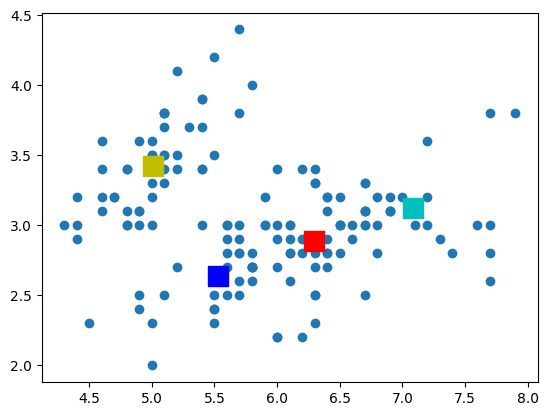

In [36]:
# Run this cell to see clusters being formed for pairs of features. Make sure to have as many colors as k and you have used similar naming of variables (update the cell below if not).
plt.scatter(data=X, x='sepal.length', y='sepal.width')
colors = ['r', 'y', 'b', 'c', 'm', 'g', 'k', 'w','orange']
for i, coor in enumerate(kmeans.cluster_centers_):
  plt.scatter(coor[0], coor[1], s=200, c=colors[i], marker='s')
plt.show()

### Experimentation

We chose an arbitrary value of k for the above experiment. In the lecture videos, we saw that elbow method is one of the ways to make a better guess for the value of k, although not always useful.

In [37]:
#Run this cell. Make sure you update the variable names if required.
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10): #Specify for which values of k you want to try
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

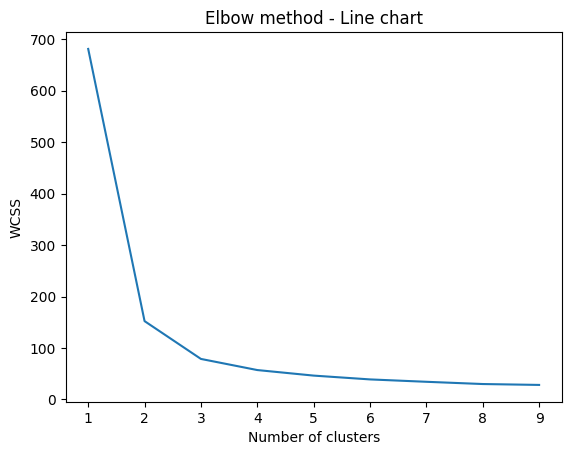

In [38]:
#Run this cell
plt.plot(range(1, 10), wcss) #Specify for which values of k you want to try
plt.title('Elbow method - Line chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

#### 1.6 Based on the videos, what can you infer from the elbow graph created? what should be a good value of k (number of clusters)? [0.5 pt]

*There are clear elbow points at 2 and 3 clusters. After 3 clusters the within-cluster sum of squares parameter has diminishing returns. Therefore, 3 should be a good value for the number of clusters for the sklearn kmeans model.*

# Part 2: Neural Networks


For this section, we will be working with the CIFAR-10 dataset.

The CIFAR-10 dataset consists of 32x32 color images, with the 10 classes below:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck


The cells below will load and visualize the data for you.

In [41]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

**Note**: The datset might take ~5 mins to load

In [42]:
# Load the CIFAR dataset
cifar = fetch_openml('cifar_10_small', version=1)
X, y = cifar.data, cifar.target

print(X.shape)
print(y.shape)

(20000, 3072)
(20000,)


In [43]:
# Convert input features and labels to NumPy arrays so that data "plays nice" with libraries
X = np.array(X)
y = np.array(y)

The cell below visualizes the images.

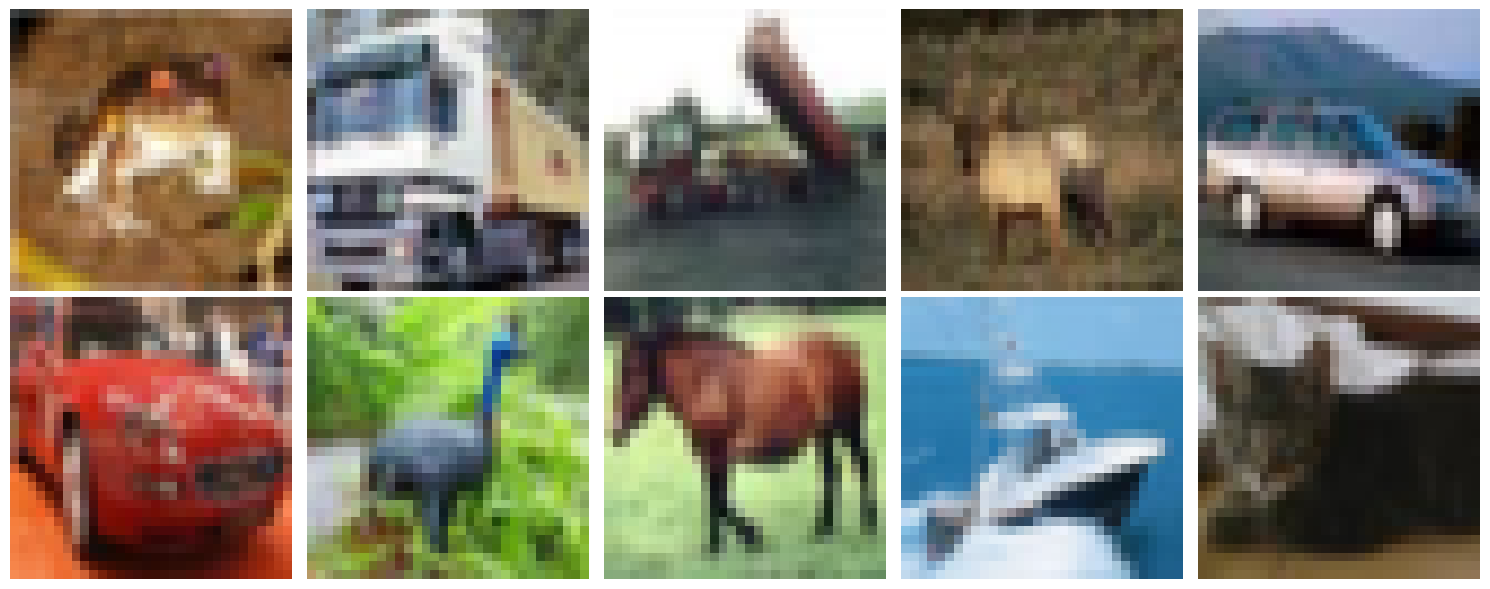

In [44]:
def visualize_images(X, y, num_rows=2, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

    # Plot each image
    for i, ax in enumerate(axes.ravel()):
        if i < len(X):

            # Creating the image
            img = np.stack([X[i].reshape(3,32, 32)[0], X[i].reshape(3,32, 32)[1], X[i].reshape(3,32, 32)[2]], axis=2)

            # Display the image
            ax.imshow(img)
            label = str(int(float(y[i])))

            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize first 10 images
visualize_images(X, y)

#### 2.1 Split the data into training and testing sets. [0.5 pts]

In [46]:
# split data 20% test data and 80% training data using train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.2 Scale the data using a StandardScaler. [0.5 pts]

In [47]:
# create instance of StandardScaler called scaler
scaler = StandardScaler()

# the fit_transform method calcs mean and stdev on training data and scales it
X_train = scaler.fit_transform(X_train)

# the transform method scales test data based on mean and std from training data
X_test = scaler.transform(X_test)

# note: standardizing the scales of our data ensures that the model is not biased towards any particular feature
# note: standardizing the scales leads to better model performance

#### 2.3 Initialize and train an MLPClassifier model. [2 pts]

Use the following hyperparameters:
* Hidden layer sizes: 256, 128, 64
* Maximum iterations: 50

Set verbose=True when creating the MLPClassifier to see which iteration of training it is on.
This may take around 5 minutes to run.

In [49]:
# initialize MLPCClassifier model called mlp
mlp =  MLPClassifier(hidden_layer_sizes=(100,128,64), max_iter=50, verbose=True,random_state=42)

# train mlp model
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.86278296
Iteration 2, loss = 1.59039212
Iteration 3, loss = 1.46568791
Iteration 4, loss = 1.36312215
Iteration 5, loss = 1.27426952
Iteration 6, loss = 1.19016895
Iteration 7, loss = 1.11325912
Iteration 8, loss = 1.04051499
Iteration 9, loss = 0.95305895
Iteration 10, loss = 0.90468715
Iteration 11, loss = 0.83478260
Iteration 12, loss = 0.75591506
Iteration 13, loss = 0.71664685
Iteration 14, loss = 0.64922208
Iteration 15, loss = 0.60799096
Iteration 16, loss = 0.56086069
Iteration 17, loss = 0.50452903
Iteration 18, loss = 0.46080319
Iteration 19, loss = 0.41642585
Iteration 20, loss = 0.40446223
Iteration 21, loss = 0.35463527
Iteration 22, loss = 0.33154116
Iteration 23, loss = 0.32211747
Iteration 24, loss = 0.30243139
Iteration 25, loss = 0.26390720
Iteration 26, loss = 0.22988286
Iteration 27, loss = 0.21439536
Iteration 28, loss = 0.19620328
Iteration 29, loss = 0.18987589
Iteration 30, loss = 0.17241450
Iteration 31, loss = 0.13465539
Iteration 32, los

/home/scotty/ucsd_venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 128, 64), max_iter=50, random_state=42,
              verbose=True)

#### 2.4 Evaluate and print the the accuracy of the model. [1 pt]

In [51]:
# import accuracy_score from sklearn.metrics to calc accuracy
# evaluate mlp model
from sklearn.metrics import accuracy_score

# evaluate mlp model
y_eval = mlp.predict(X_test)

# calc accuracy of mpl model
accuracy = accuracy_score(y_test,y_eval)

# print accuracy of mpl model
print(accuracy)

0.431


# Part 3: Video (Optional)

Tune the hyperparameters of your Multi-layer Perceptron classifier to improve your accuracy from part 2.4. Describe your strategy for doing so.

LINK TO VIDEO HERE: